# SeaBorn

In [1]:
import seaborn as sns
penguins = sns.load_dataset("penguins") #este dataset esta incluido en la libreria seaborn, no es nuestro
penguins


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


<Axes: xlabel='flipper_length_mm', ylabel='Count'>

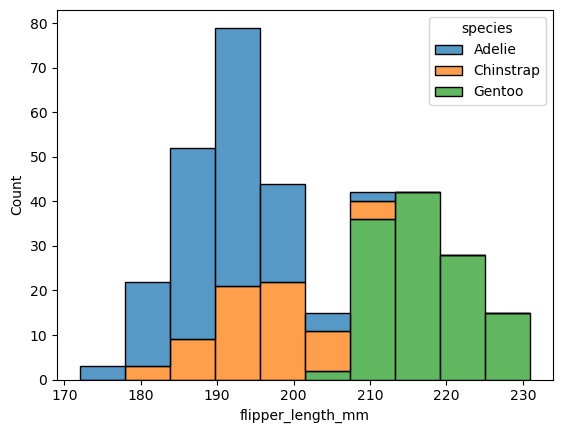

In [2]:
# Axes-level
sns.histplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")  

#x="flipper_length_mm": Este argumento indica qué variable se va a representar en el eje x del histograma.

#hue="species": Este argumento indica cómo se va a diferenciar las categorías de datos en el histograma.
#hue (indica la columna por la cual queremos que divida y nos muestre los diferentes colores)

#multiple="stack": Este argumento controla cómo se apilan los histogramas cuando hay varias categorías. "Stack" significa que los histogramas se apilarán uno encima del otro, 

c:\Users\VICTUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


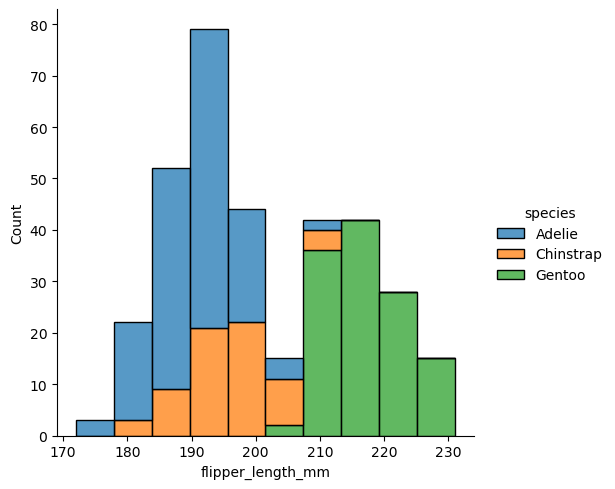

In [15]:
# Figure-level
sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack") #cambia la leyenda

c:\Users\VICTUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


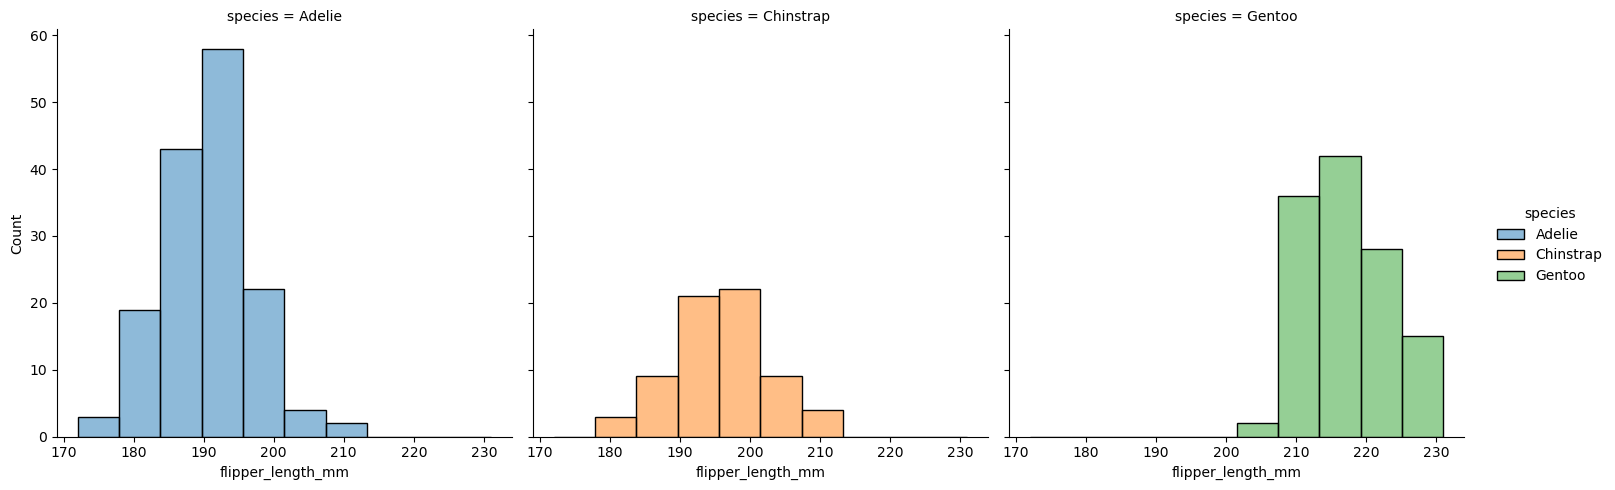

In [6]:
# Multiples figuras (Figure-level)
sns.displot(data=penguins, x="flipper_length_mm", hue="species", col="species") #para que me haga una columna por cada especie, no le paso el multiple

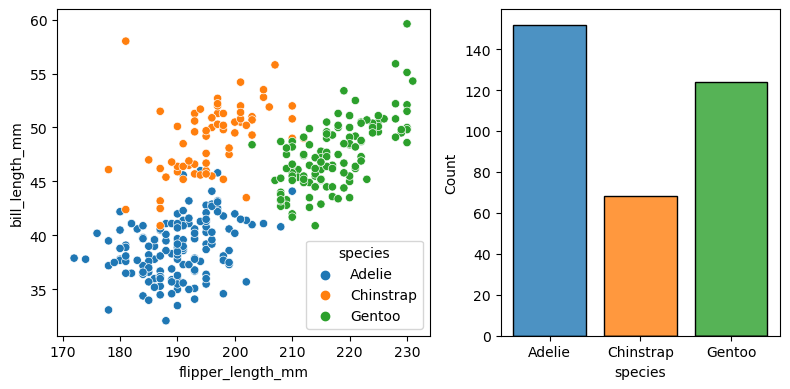

In [7]:
# Axes level
import matplotlib.pyplot as plt

#subplots (1 fila, 2 columnas, tamanio, gridspec_kw (proporcion de un grafico con el otro--> 4 partes la ocupa el primer grafico y 3 el segundo ))
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3])) #seteo el lienzo

sns.scatterplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species", ax=axs[0]) #grafico relacional (para ver como se relaciona una variable con otra), ax=axs[0]para que aparezca primero
sns.histplot(data=penguins, x="species", hue="species", shrink=.8, alpha=.8, legend=False, ax=axs[1]) #shrink=.8 (para ver el tamanio de lo de abajo), alpha=.8 (transpoarencia), legend=False (para que no aparezca la leyenda), 
f.tight_layout() 

c:\Users\VICTUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


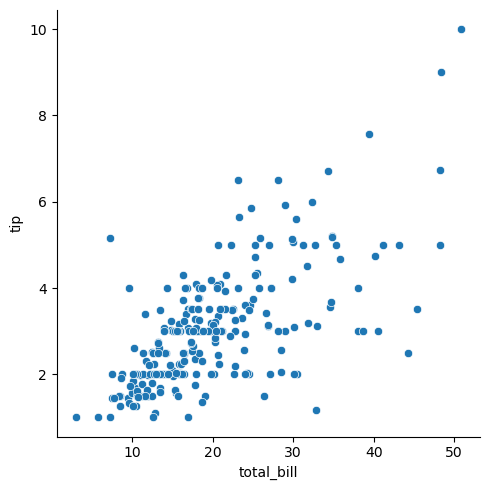

In [8]:
# Figure-level
tips = sns.load_dataset("tips")
g = sns.relplot(data=tips, x="total_bill", y="tip")

In [13]:
# Lineplot
flights = sns.load_dataset("flights") #nos traemos otro dataset de seaborn
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


<Axes: xlabel='year', ylabel='passengers'>

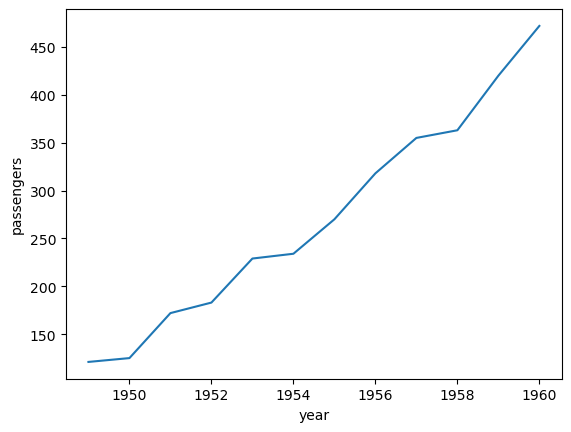

In [15]:
# Axis-level
may_flights = flights.query("month == 'May'") #filtro de solo los pasajeros de mayo
#may_flights=flights[flights['month']=='May']
sns.lineplot(data=may_flights, x="year", y="passengers") #grafico de linea para mostrar continuidad, paso del tiempo

In [18]:
# Axis-level
#flights_wide = flights.pivot("year", "month", "passengers") #tablas pivot, agrupame por anio en primer lugar y despues por mes
flights_wide = flights.pivot(index='year',columns='month',values='passengers')
flights_wide.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


<Axes: xlabel='year'>

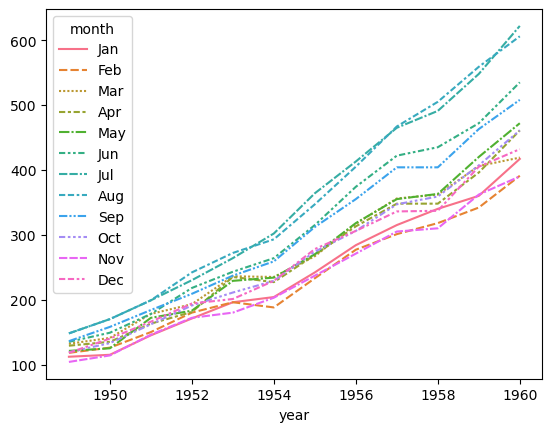

In [19]:
sns.lineplot(data=flights_wide)

In [20]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='total_bill', ylabel='tip'>

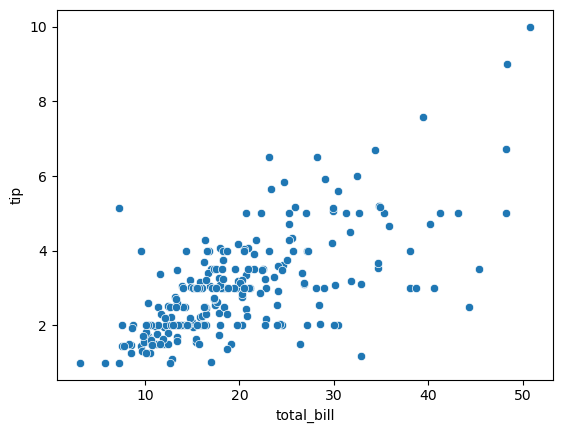

In [21]:
# Scatterplot
sns.scatterplot(data=tips, x="total_bill", y="tip")

<Axes: xlabel='total_bill', ylabel='tip'>

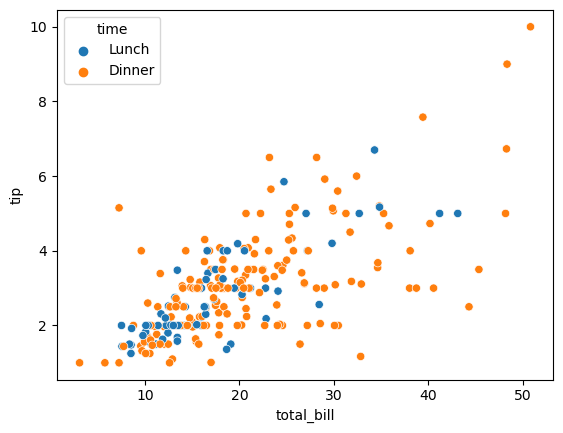

In [22]:
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="time") #te lo divide por color, hue divide por time

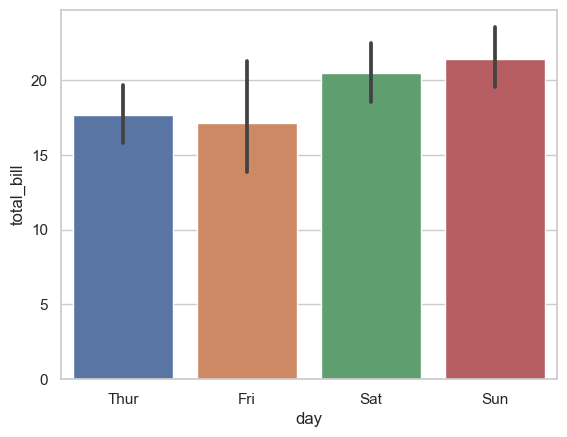

In [32]:
# Barplot
import seaborn as sns
sns.set_theme(style="whitegrid") #paleta de color
tips = sns.load_dataset("tips")
ax = sns.barplot(x="day", y="total_bill", data=tips) #grafico de barras

<Axes: xlabel='day', ylabel='total_bill'>

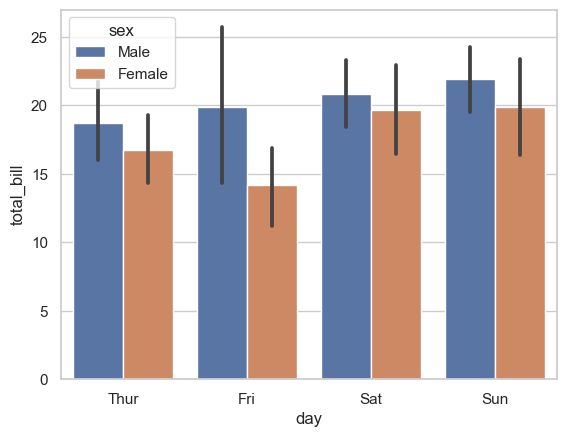

In [27]:
sns.barplot(x="day", y="total_bill", hue="sex", data=tips) # agrego hue para dividir por sexo

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

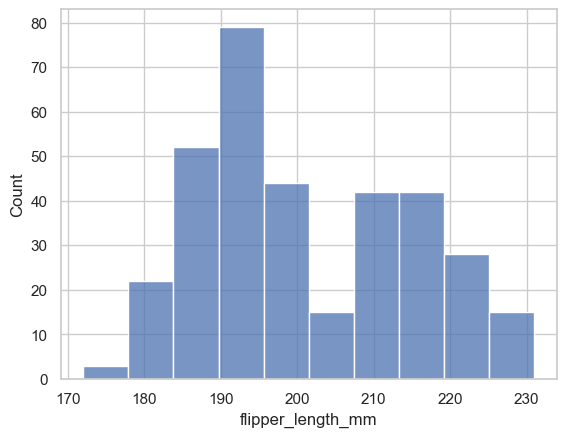

In [28]:
# Histograma
penguins = sns.load_dataset("penguins")
# Axis-level
sns.histplot(data=penguins, x="flipper_length_mm")

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

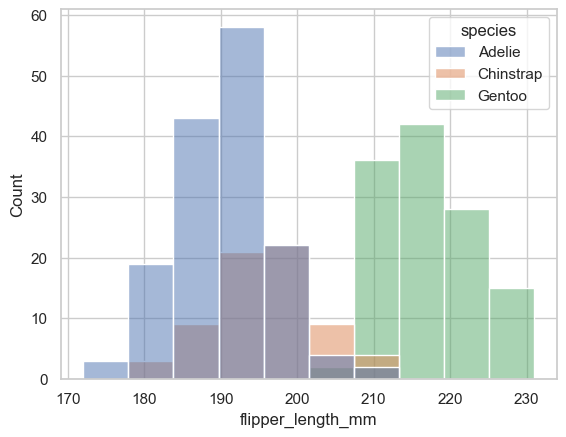

In [31]:
# Axis-level
sns.histplot(data=penguins, x="flipper_length_mm", hue="species")

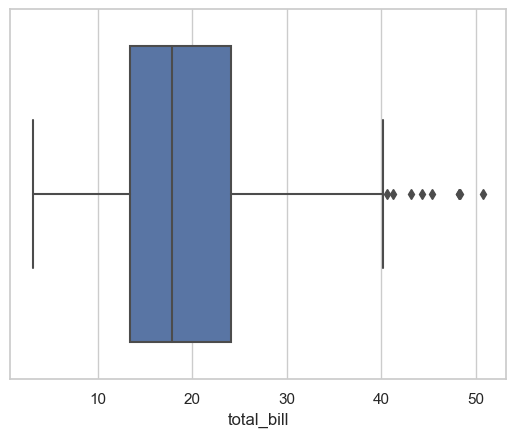

In [38]:
import seaborn as sns
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
# Axis-level
ax = sns.boxplot(x=tips["total_bill"])

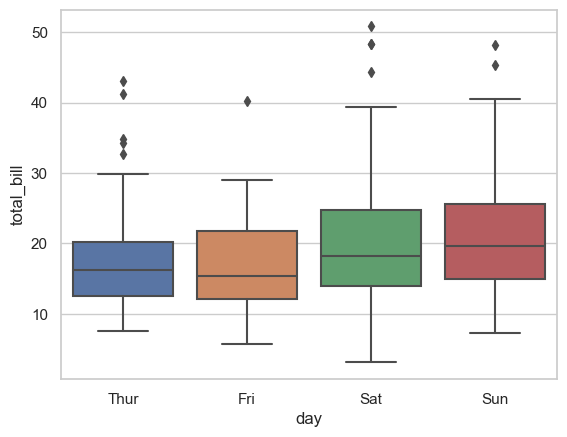

In [39]:
# Axis-level
ax = sns.boxplot(x="day", y="total_bill", data=tips) #le paso y para dividirlo por dia

In [57]:
import pandas as pd
df_lluvias = pd.read_csv("C:\\Users\\VICTUS\\Documents\\2024\\DATA SCIENCE\\SeaBorn\\pune_1965_to_2002.csv")
df_lluvias.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1965,0.029,0.069,0.000,21.667,17.859,102.111,606.071,402.521,69.511,5.249,16.232,22.075
1,1966,0.905,0.000,0.000,2.981,63.008,94.088,481.942,59.386,150.624,1.308,41.214,4.132
2,1967,0.248,3.390,1.320,13.482,11.116,251.314,780.006,181.069,183.757,50.404,8.393,37.685
3,1968,0.318,3.035,1.704,23.307,7.441,179.872,379.354,171.979,219.884,73.997,23.326,2.020
4,1969,0.248,2.524,0.334,4.569,6.213,393.682,678.354,397.335,205.413,24.014,24.385,1.951


In [58]:
df_lluvias.set_index('Year', inplace=True) #paso la columna a indice
df_lluvias.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1965,0.029,0.069,0.000,21.667,17.859,102.111,606.071,402.521,69.511,5.249,16.232,22.075
1966,0.905,0.000,0.000,2.981,63.008,94.088,481.942,59.386,150.624,1.308,41.214,4.132
1967,0.248,3.390,1.320,13.482,11.116,251.314,780.006,181.069,183.757,50.404,8.393,37.685
1968,0.318,3.035,1.704,23.307,7.441,179.872,379.354,171.979,219.884,73.997,23.326,2.020
1969,0.248,2.524,0.334,4.569,6.213,393.682,678.354,397.335,205.413,24.014,24.385,1.951


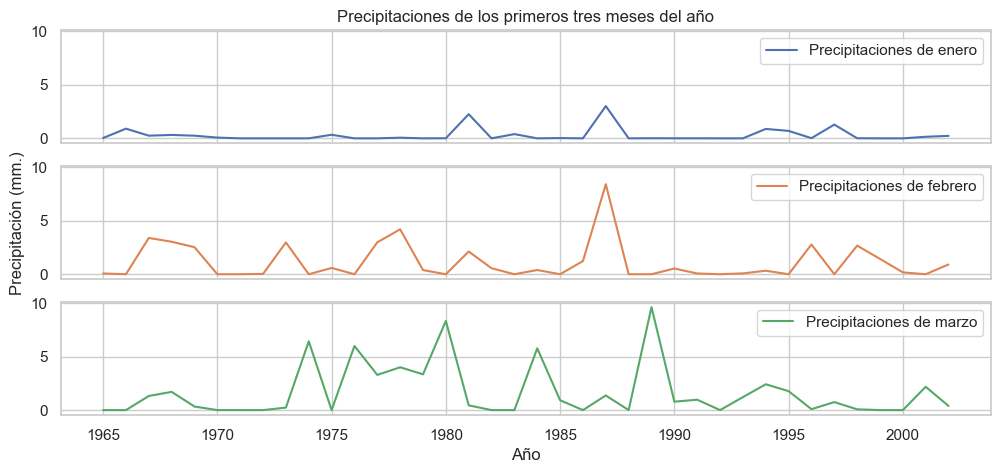

In [60]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 5), sharex=True, sharey=True) #3 filas 1 columna, tamanio de los graficos , sharex, sharey son las escalas del eje x y del eje y (true si quiero que la compartan)

ax[0].plot(df_lluvias.index, df_lluvias['Jan'], label='Precipitaciones de enero') #seteame junio y ponele el label

ax[1].plot(df_lluvias.index, df_lluvias['Feb'], label='Precipitaciones de febrero', color='C1') #seteame el label y el color

ax[2].plot(df_lluvias.index, df_lluvias['Mar'], label='Precipitaciones de marzo', color='C2') #seteame el label y el color

ax[0].set_title('Precipitaciones de los primeros tres meses del año') #titulo general del grafico

ax[2].set_xlabel('Año') #titulo del eje x
ax[1].set_ylabel('Precipitación (mm.)') #titulo del eje y

ax[0].legend()
ax[1].legend()
ax[2].legend()

c:\Users\VICTUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


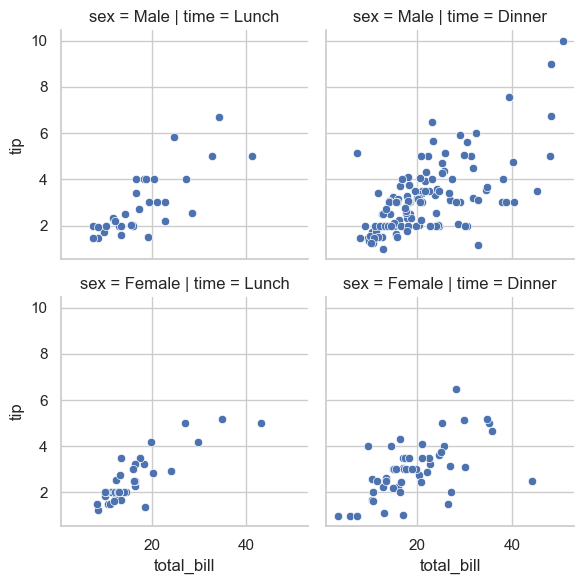

In [61]:
# FacetGrid
tips = sns.load_dataset("tips")
g = sns.FacetGrid(tips, col="time",  row="sex")
g.map(sns.scatterplot, "total_bill", "tip")

c:\Users\VICTUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


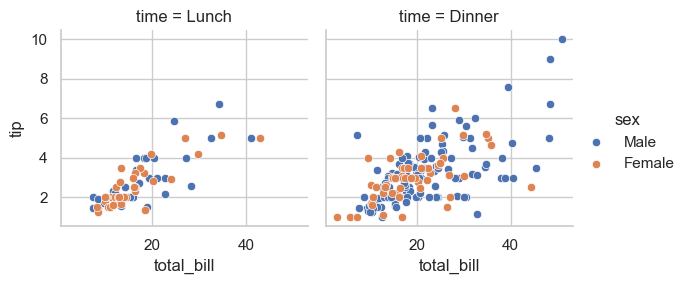

In [63]:
g = sns.FacetGrid(tips, col="time", hue="sex") #hue, color distinto por cada variable
g.map_dataframe(sns.scatterplot, x="total_bill", y="tip")
g.add_legend()

PERSONALIZACION

Text(0, 0.5, '(Etiqueta eje vert.)')

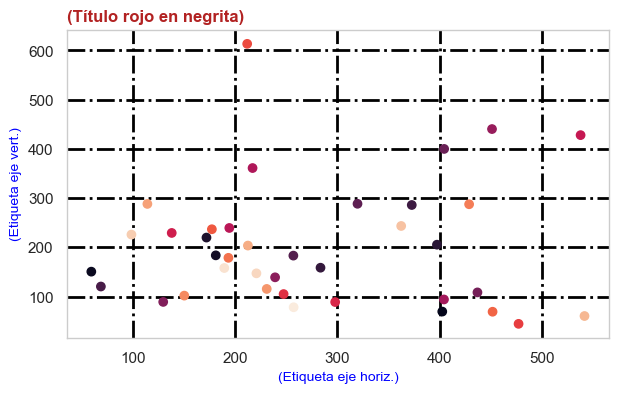

In [70]:
import matplotlib as mpl
mpl.rcParams['axes.titleweight'] = 'bold' 
mpl.rcParams['axes.titlelocation'] = 'left' #DONDE el titulo
mpl.rcParams['axes.titlecolor'] = 'firebrick' #color
mpl.rcParams['axes.labelcolor'] = 'blue' #color del label
mpl.rcParams['axes.labelsize'] = '10' #tamanio
mpl.rcParams['axes.labelweight'] = 'light' #ancho
mpl.rcParams['axes.linewidth'] = '1'
mpl.rcParams['grid.color'] = 'black'
mpl.rcParams['grid.linestyle'] = '-.'
mpl.rcParams['grid.linewidth'] = '2'

fig, ax = plt.subplots(figsize=(7, 4))
ax.scatter(df_lluvias['Aug'], df_lluvias['Sep'], c=df_lluvias.index) #c=color
ax.set_title('(Título rojo en negrita)')
ax.set_xlabel('(Etiqueta eje horiz.)')
ax.set_ylabel('(Etiqueta eje vert.)')

In [72]:
#  Restaurar por defecto
mpl.rcParams.update(mpl.rcParamsDefault) #si customice mucho puedo ponerlo por default

In [74]:
mpl.rcParams.keys() #me muestra todos los arumentos que acepta

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'b

In [76]:
mpl.rcParams #esto es como esta actualmente 

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
   

PERSONALIZACION CON SEABORN

In [78]:
sns.set_style(style="darkgrid", rc={"grid.color": ".6"})
sns.set_style(rc={"grid.linestyle": ":"})
sns.set_style(rc={"axes.titleweight": "normal"})
sns.set_style(rc={"axes.titlelocation": "left"})
sns.set_style(rc={"axes.titlecolor": "blue"})
sns.set_style(rc={"axes.labelcolor": "red"})
sns.set_style(rc={"axes.labelsize": "12"})
sns.set_style(rc={"axes.labelweight": "normal"})
sns.set_style(rc={"axes.linewidth": "0.5"})
sns.set_style(rc={"grid.color": "purple"})
sns.set_style(rc={"grid.linestyle": "--"}) #punteo
sns.set_style(rc={"grid.linewidth": "0.5"})
sns.set_style(rc={"font.fantasy": "Comic Sans MS"}) #fuente
sns.set_style(rc={"font.serif": "Utopia"})

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

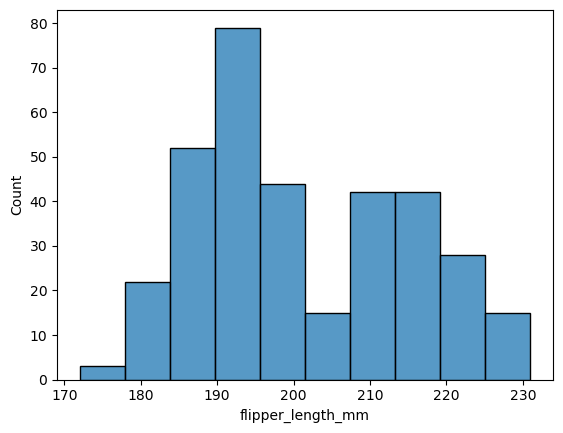

In [3]:
penguins = sns.load_dataset("penguins")
# Axis-level
sns.histplot(data=penguins, x="flipper_length_mm")

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

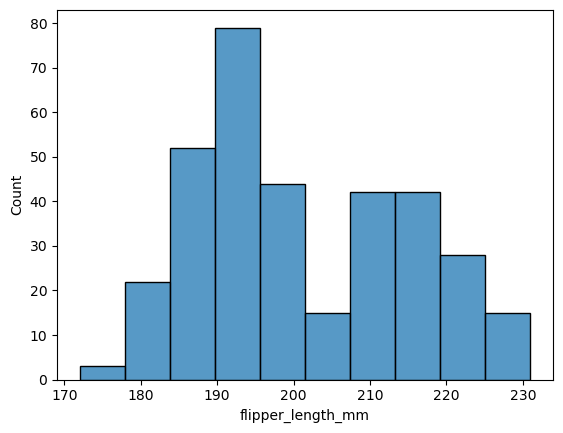

In [2]:
sns.reset_orig()
penguins = sns.load_dataset("penguins")
# Axis-level
sns.histplot(data=penguins, x="flipper_length_mm")

In [7]:
# Ejemplo aplicado
df_ejercicio = sns.load_dataset('exercise')
df_ejercicio = df_ejercicio.drop('Unnamed: 0', axis='columns')
df_ejercicio.head()

,id,diet,pulse,time,kind
0,1,low fat,85,1 min,rest
1,1,low fat,85,15 min,rest
2,1,low fat,88,30 min,rest
3,2,low fat,90,1 min,rest
4,2,low fat,92,15 min,rest


In [8]:
df_30_min = df_ejercicio[df_ejercicio['time'] == '30 min']
df_30_min.head()

,id,diet,pulse,time,kind
2,1,low fat,88,30 min,rest
5,2,low fat,93,30 min,rest
8,3,low fat,94,30 min,rest
11,4,low fat,83,30 min,rest
14,5,low fat,91,30 min,rest


c:\Users\VICTUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


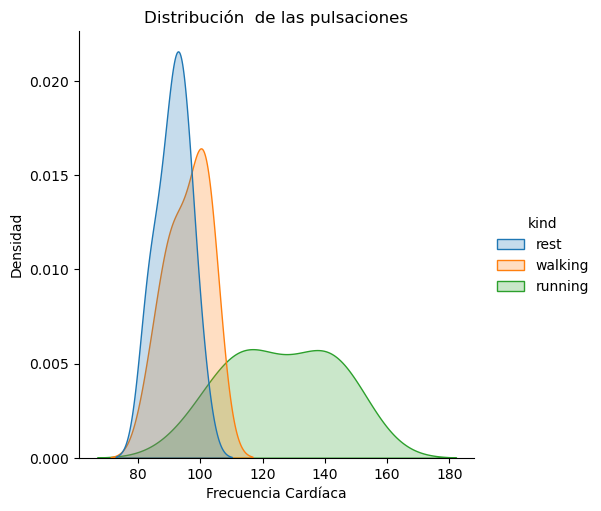

In [14]:
import matplotlib as plt
plt.figure
# Figure -level
ax = sns.displot(data=df_30_min, x='pulse', kind='kde', hue='kind', fill=True)
ax.set(xlabel='Frecuencia Cardíaca', ylabel='Densidad', title='Distribución  de las pulsaciones')

c:\Users\VICTUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


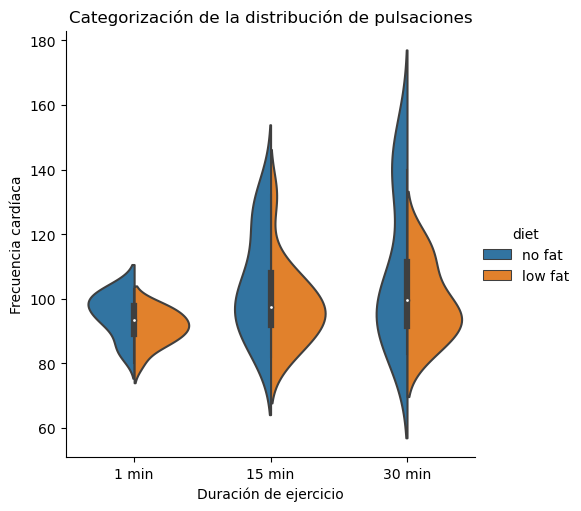

In [10]:
ax = sns.catplot(data=df_ejercicio, kind='violin', x='time', y='pulse', hue='diet', split=True)
ax.set(xlabel='Duración de ejercicio', ylabel='Frecuencia cardíaca', title='Categorización de la distribución de pulsaciones')